### Imoporting data from `ucimlrepo`

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


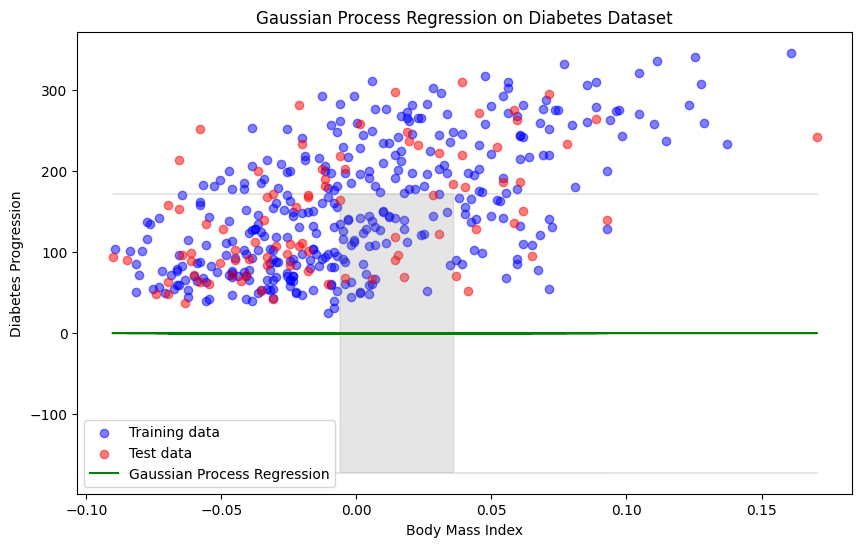

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import train_test_split

# Load the Diabetes Dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Selecting only one feature for simplicity
X = X[:, np.newaxis, 2]  # Using the third feature (body mass index)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Process Regression
kernel = RBF() + WhiteKernel()
gp_regressor = GaussianProcessRegressor(kernel=kernel, random_state=42)
gp_regressor.fit(X_train, y_train)

# Predictions
y_pred, y_std = gp_regressor.predict(X_test, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data', alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='Test data', alpha=0.5)
plt.plot(X_test, y_pred, color='green', label='Gaussian Process Regression')
plt.fill_between(X_test[:, 0], y_pred - y_std, y_pred + y_std, color='gray', alpha=0.2)
plt.xlabel('Body Mass Index')
plt.ylabel('Diabetes Progression')
plt.title('Gaussian Process Regression on Diabetes Dataset')
plt.legend()
plt.show()
